# Procesamiento de Imágenes Digitales

Visión Computacional 2020-21 <br>
Practica 1. 6 de octubre de 2020

Autor1: Alejandro Francisco Toral<br>
Autor2: Enrique Martín López

## Objetivos


Los objetivos de esta práctica son:
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X, preferiblemente el segundo
* Jupyter http://jupyter.org/.
* Los paquetes ``python-pip`` y/o ``python-pip3`` y el paquete "PyMaxFlow"
* Las librerías científicas de Python: NumPy (``python-numpy``), SciPy (``python-scipy``) y Matplotlib (``python-matplotlib``).
* El paquete ``python-pygame``
* La librería OpenCV, que puedes instalar desde el paquete ``python-opencv``.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el lunes 26 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con el fuente y los resultados (ejecuta "Restart & Run all" antes de guardar)
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``. Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados (previamente ejecuta en el menú "Kernel" la opción "Restart & Run All").
* Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
* La puntuación del ejercicio 7 es el triple que el resto.
* Las prácticas puede realizarse en parejas. Sólo es necesario que uno de los miembros del equipo entregue la práctica.

## Instala el entorno de trabajo

1. Instala el entorno de trabajo.

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    En Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip install pygame``

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage``.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también también puedes utilizar otras imágenes
que te parezcan interesantes.

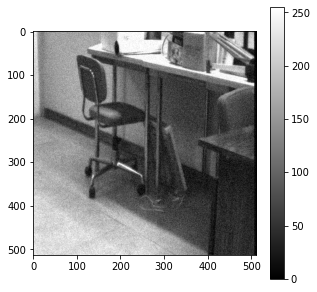

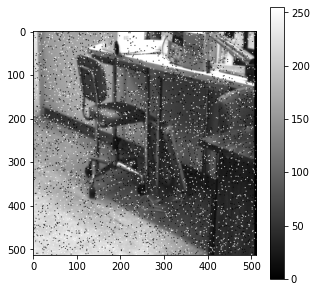

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import scipy.misc as spm
import imageio
import cv2

ESCGAUS_FILE = "imagenes/escgaus.bmp"
ESCIMPS_FILE = "imagenes/escimp5.bmp"


escgaus = imageio.imread(ESCGAUS_FILE)
escimps = imageio.imread(ESCIMPS_FILE)

plt.figure(figsize=(5,5))
plt.imshow(escgaus, cmap='gray')
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(escimps, cmap='gray')
plt.colorbar()

**Ejercicio 1.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ. Filtra las imágenes
anteriores con filtros gaussianos bidimensionales de diferentes tamaños
de *n*, y/o σ.

En este ejercicio tenéis que implementar vosotros la función que construye la máscara. No podéis usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra cómo afecta este filtrado a los dos tipos de ruido que contaminan las imágenes anteriores y discute los resultados. Pinta alguna de las máscaras utilizadas.

In [2]:
import math
import scipy.ndimage as snd

def im2float(im):
  return cv2.normalize(im.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

def masc_gaus(sigma, n):
  if n % 2 == 0:
    r = list(range(-int(n/2)+1,int(n/2)))
    r.insert(int(len(r)/2),0)
  else:
    r = list(range(-int(n/2),int(n/2)+1))

  h = np.zeros(len(r))
  it = 0
  for x in r:
    div = 1.0 / (math.sqrt(2.0 * math.pi) * sigma)
    exp = math.exp(-(x ** 2) / (2.0 * sigma**2))
    filter_pixel = div*exp
    h[it] = filter_pixel
    it = it+1
  return h


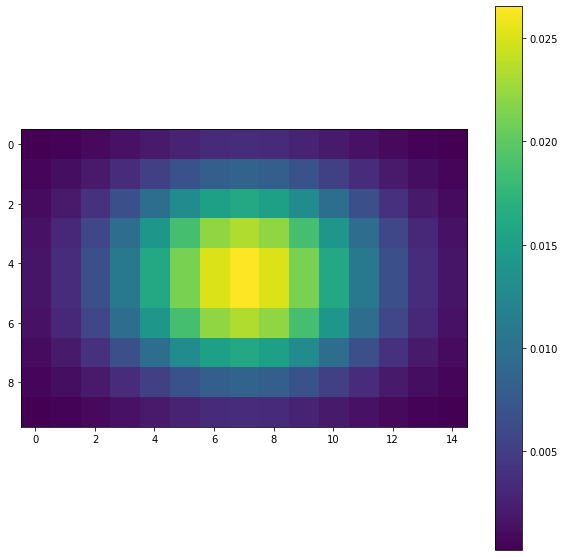

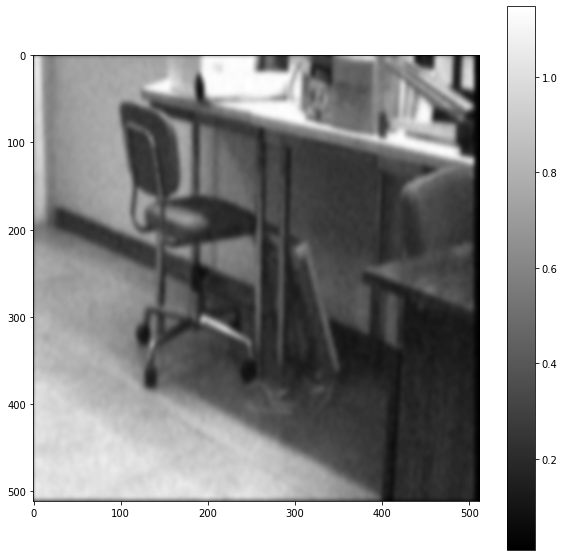

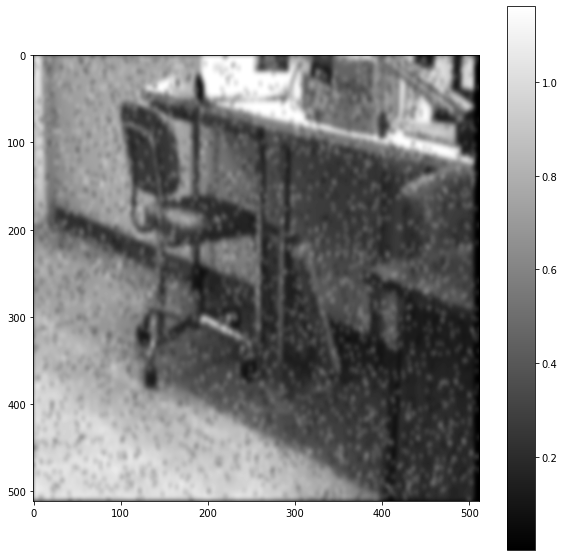

In [3]:
sigma_x = 2
sigma_y = 3
n_x = 10
n_y = 15

masc_x = masc_gaus(sigma_x,n_x)
masc_y = masc_gaus(sigma_y,n_y)

masc = np.outer(masc_x,masc_y)

plt.figure(figsize=(10,10))
plt.imshow(masc)
plt.colorbar()

escgaus_float = im2float(escgaus)
escgaus_filtered = snd.convolve1d(escgaus_float, masc_x, mode='constant', cval = 0.0, axis=-1)
escgaus_filtered = snd.convolve1d(escgaus_filtered, masc_y, mode='constant', cval = 0.0, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(escgaus_filtered, cmap='gray')
plt.colorbar()

escimps_float = im2float(escimps)
escimps_filtered = snd.convolve1d(escimps_float, masc_x, mode='constant', cval = 0.0, axis=-1)
escimps_filtered = snd.convolve1d(escimps_filtered, masc_y, mode='constant', cval = 0.0, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(escimps_filtered, cmap='gray')
plt.colorbar()

El filtro gaussiano provoca un suavizado en las imágenes de entrada. Disminuye la nitidez y aumenta la
borrosidad de las fotografías, provocando la pérdida de detalles.

En el primer caso, sobre la imagen escgaus, el suavizado es más evidente, por lo que el ruido se elimina.
El mayor problema se encuentra en el emborronamiento, que hace que la imagen parezca movida.

El filtro aplicado a la imagen escimps elimina los pixeles blancos y negros sobre la imagen original,
pero deja evidentes signos de retoque.

**Ejercicio 2.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Convierte de RGB a escala de grises y filtra la imagen ``telefonica.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

(671, 1002, 3)


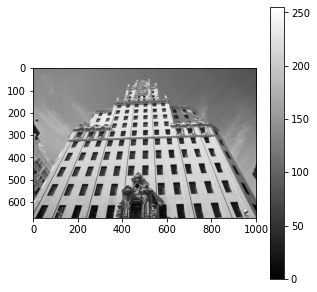

In [4]:
TELEFONICA_FILE = "imagenes/telefonica.jpg"

telefonica = imageio.imread(TELEFONICA_FILE)
print(telefonica.shape)
telefonica_gray = cv2.cvtColor(telefonica, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(telefonica_gray, cmap='gray')
plt.colorbar()

In [5]:
def pow2divisionNSigma(value, n, sigma):
  n_op = (n-1)/2
  value_op = value - n_op
  sigma_op = value_op / sigma
  return math.pow(sigma_op,2)

def masc_deriv_gaus(sigma, n):
  if n % 2 == 0:
    r = list(range(-int(n/2)+1,int(n/2)))
    r.insert(int(len(r)/2),0)
  else:
    r = list(range(-int(n/2),int(n/2)+1))

  h = np.zeros(len(r))
  it = 0
  for x in r:
    div = -(x/((sigma**3)*math.sqrt(2*math.pi)))
    exp = math.exp(-((x**2)/(2*(sigma**2))))
    
    filter_pixel = div*exp
    h[it] = filter_pixel
    it = it+1
  return h

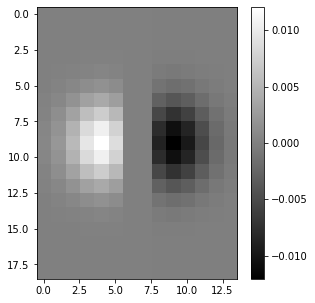

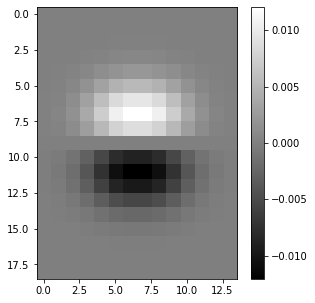

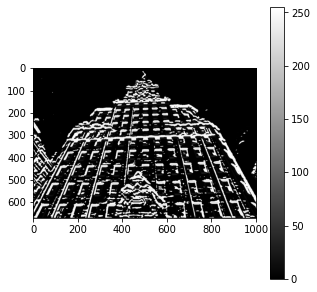

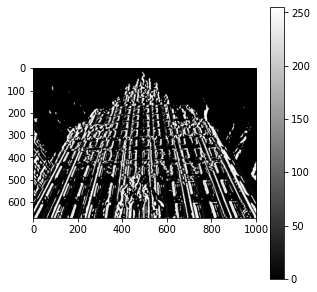

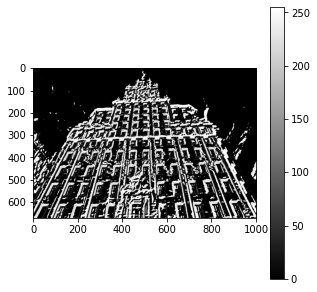

In [32]:
def im2float(im):
  return cv2.normalize(im.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

sigma_x = 2
sigma_y = 2
n_x = 14
n_y = 19

hx = masc_gaus(sigma_x,n_x)
hdx = masc_deriv_gaus(sigma_x,n_x)

hy = masc_gaus(sigma_y,n_y)
hdy = masc_deriv_gaus(sigma_y,n_y)

plt.figure(figsize=(5,5))
plt.imshow(np.outer(hdx,hy).T, cmap='gray')
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(np.outer(hdy,hx), cmap='gray')
plt.colorbar()

Ix = snd.convolve1d(telefonica_gray, weights=hy, axis=1)
Ix = snd.convolve1d(Ix, weights=hdx, axis=0)

Iy = snd.convolve1d(telefonica_gray, weights=hx, axis=0)
Iy = snd.convolve1d(Iy, weights=hdy, axis=1)

plt.figure(figsize=(5,5))
plt.imshow(Ix, cmap='gray')
plt.colorbar()

plt.figure(figsize=(5,5))
plt.imshow(Iy, cmap='gray')
plt.colorbar()

I = np.absolute(Ix) + np.absolute(Iy)

plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
plt.colorbar()

**Ejercicio 3.** Utiliza la función ``median_filter`` del paquete ``scipy.ndimage``
que realiza el filtrado de la imagen con un filtro de la mediana de tamaño *n* × *n*.

Muestra y discute los resultados para diferentes valores del parámetro *n* en ambas imágenes. Compáralos con los obtenidos en el Ejercicio 1.

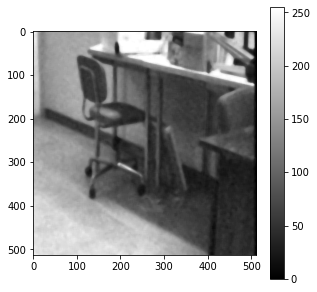

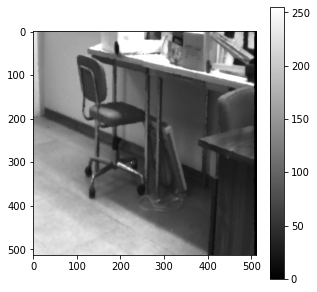

In [91]:
import math
import scipy.ndimage as snd

escgaus_median_filter = snd.median_filter(escgaus, size=8)
plt.figure(figsize=(5,5))
plt.imshow(escgaus_median_filter, cmap='gray')
plt.colorbar()

escimps_median_filter = snd.median_filter(escimps, size=5)
plt.figure(figsize=(5,5))
plt.imshow(escimps_median_filter, cmap='gray')
plt.colorbar()

Hay una mejora notable con respecto al uso del filtro gausiano en el primer ejercicio. 

En cuanto la imagen escgaus, el filtro de la mediana hace que la imagen sea más nítida, haciendo que se recuperen los detalles
que se perdieron por el efecto borroso del filtro gaussiano. El resultado no es perfecto, pues sigue habiendo algo de ruido
en la imagen final.

En lo que respecta a la imagen escimps, el resultado es mucho mejor que utilizando el filtro gaussiano. La imagen resulttante
es nítida y detallada, sin casi marcas de haber utilizado un filtro de rectificación.

Tras una serie de comparaciones previas, se ha determinado que el tamaño optimo de la máscara es:
    - s=8 para escgaus
    - s=5 para escimps

**Ejercicio 4.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``tapiz.jpg``, ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros, tanto para las imágenes contaminadas con ruido gaussiano como impulsivo. Compáralos con los obtenidos en el Ejercicio 1.

In [92]:
TAPIZ_FILE = "imagenes/tapiz.png"

tapiz = imageio.imread(TAPIZ_FILE)

ESCGAUS_FILE = "imagenes/escgaus.bmp"

escgaus = imageio.imread(ESCGAUS_FILE)

ESCIMPS_FILE = "imagenes/escimp5.bmp"

escimps = imageio.imread(ESCIMPS_FILE)

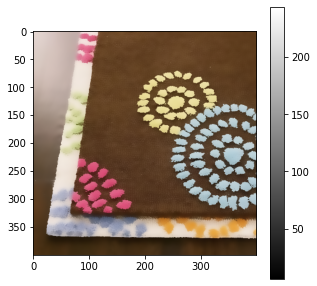

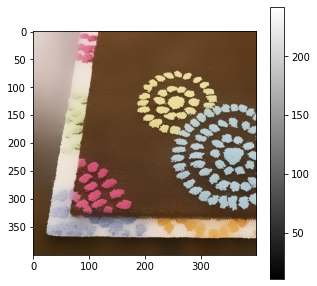

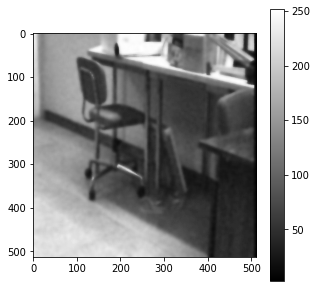

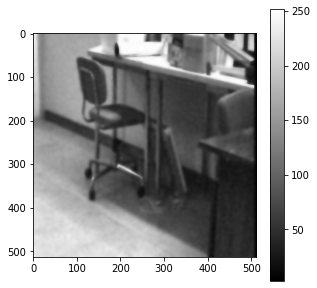

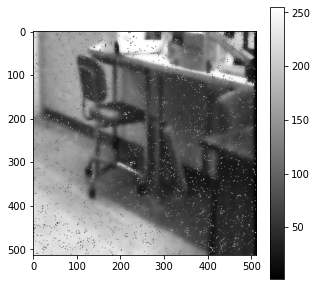

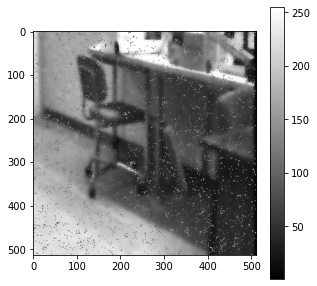

In [93]:
tapiz_filter = cv2.bilateralFilter(tapiz, 10, 100, 100)
plt.figure(figsize=(5,5))
plt.imshow(tapiz_filter, cmap='gray')
plt.colorbar()

tapiz_filter2 = cv2.bilateralFilter(tapiz, 100, 100, 10)
plt.figure(figsize=(5,5))
plt.imshow(tapiz_filter2, cmap='gray')
plt.colorbar()


escgaus_filter = cv2.bilateralFilter(escgaus, 10, 90, 90)
plt.figure(figsize=(5,5))
plt.imshow(escgaus_filter, cmap='gray')
plt.colorbar()

escgaus_filter2 = cv2.bilateralFilter(escgaus, 10, 90, 9)
plt.figure(figsize=(5,5))
plt.imshow(escgaus_filter2, cmap='gray')
plt.colorbar()

escimps_filter = cv2.bilateralFilter(escimps, 15, 90, 90)
plt.figure(figsize=(5,5))
plt.imshow(escimps_filter, cmap='gray')
plt.colorbar()

escimps_filter2 = cv2.bilateralFilter(escimps, 15, 90, 9)
plt.figure(figsize=(5,5))
plt.imshow(escimps_filter2, cmap='gray')
plt.colorbar()

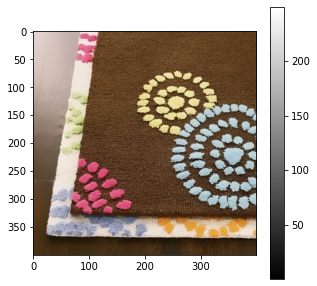

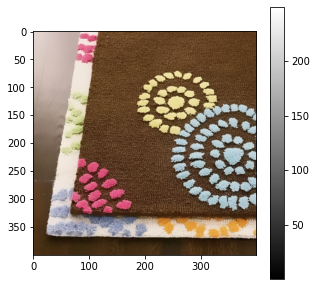

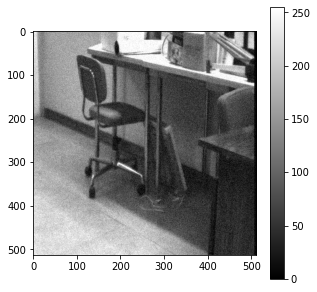

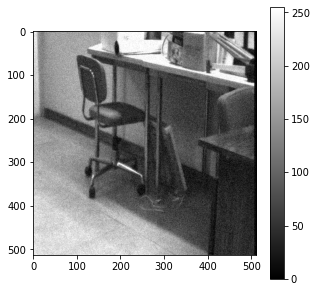

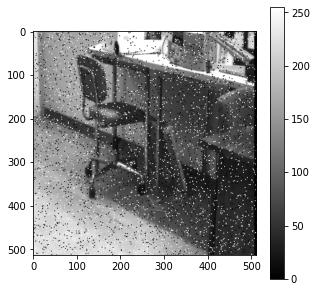

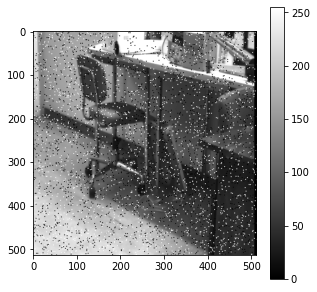

In [94]:
tapiz_filter3 = cv2.bilateralFilter(tapiz, 10, 10, 100)
plt.figure(figsize=(5,5))
plt.imshow(tapiz_filter3, cmap='gray')
plt.colorbar()

tapiz_filter4 = cv2.bilateralFilter(tapiz, 10, 10, 10)
plt.figure(figsize=(5,5))
plt.imshow(tapiz_filter4, cmap='gray')
plt.colorbar()

escgaus_filter3 = cv2.bilateralFilter(escgaus, 10, 5, 90)
plt.figure(figsize=(5,5))
plt.imshow(escgaus_filter3, cmap='gray')
plt.colorbar()

escgaus_filter4 = cv2.bilateralFilter(escgaus, 10, 5, 5)
plt.figure(figsize=(5,5))
plt.imshow(escgaus_filter4, cmap='gray')
plt.colorbar()

escimps_filter3 = cv2.bilateralFilter(escimps, 10, 5, 90)
plt.figure(figsize=(5,5))
plt.imshow(escimps_filter3, cmap='gray')
plt.colorbar()

escimps_filter4 = cv2.bilateralFilter(escimps, 10, 5, 5)
plt.figure(figsize=(5,5))
plt.imshow(escimps_filter4, cmap='gray')
plt.colorbar()

## Transformada de Hough

**Ejercicio 5.** Utiliza la función ``cv2.HoughLines()`` de OpenCV para encontrar líneas en la imagen ``telefonica.jpg`` y ``urjc.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas más arriba. 

Discute cómo  has realizado la conversión de RGB a niveles de gris, el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (te proporcionamos algo de código por si fuese útil).

In [9]:
import cv2
import matplotlib.pyplot as plt

def draw_lines(img, lines, color=(0, 0, 255), thickness=2):
    """
    Draws a set of lines detected using the OpenCV Hough transform
    :param img: An input image in BGR format of type np.int8
    :param lines: List or Numpy array containing the parameters of the homogeneous line as: ax + by + c = 0
    :param color: The color used to draw the lines. Red by default.
    :param thickness: The thickness of the lines to be drawn
    """
    if lines is not None:
        for i in range(len(lines)):
            eq = lines[i]
            rho = -eq[2]
            a = eq[0]
            b = eq[1]
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 - 1000 * b)
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 + 1000 * b)
            y2 = int(y0 - 1000 * a)

            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
################################################################################

(671, 1002, 3)


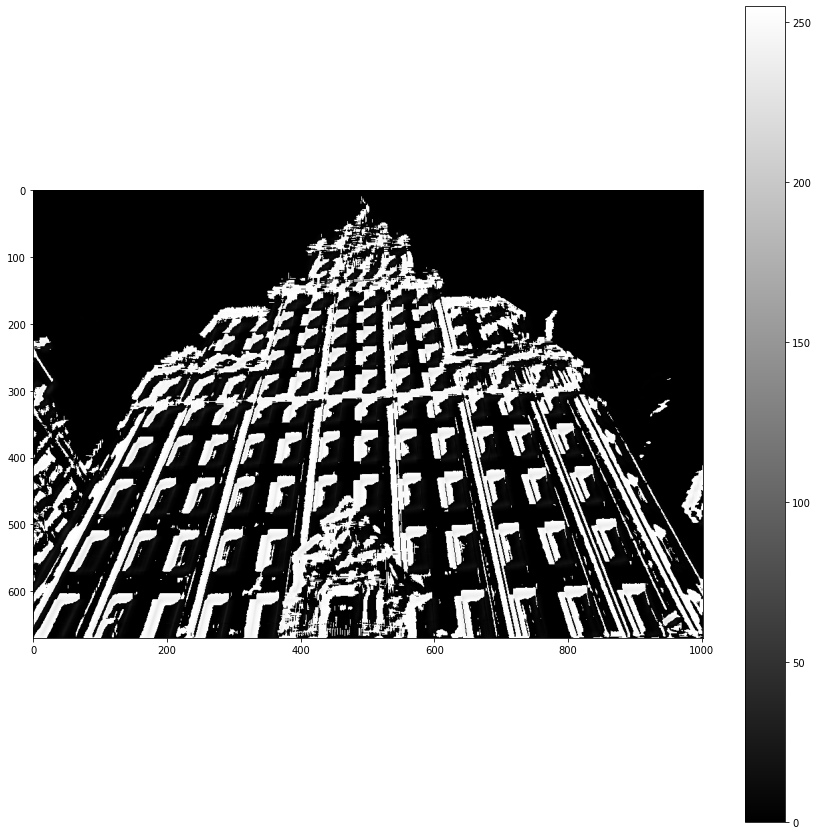

In [33]:
TELEFONICA_FILE = "imagenes/telefonica.jpg"
telefonica = imageio.imread(TELEFONICA_FILE)
print(telefonica.shape)
telefonica_gray = cv2.cvtColor(telefonica, cv2.COLOR_BGR2GRAY)

sigma_x = 4
sigma_y = 5
n_x = 20
n_y = 25

hx = masc_gaus(sigma_x,n_x)
hdx = masc_deriv_gaus(sigma_x,n_x)

hy = masc_gaus(sigma_y,n_y)
hdy = masc_deriv_gaus(sigma_y,n_y)

Ix = snd.convolve1d(telefonica_gray, weights=hdx, axis=0)
Iy = snd.convolve1d(telefonica_gray, weights=hdy, axis=1)

telefonica_edges = np.absolute(Ix) + np.absolute(Iy)
#telefonica_edges = cv2.Canny(telefonica_gray,50,150,apertureSize = 3)

plt.figure(figsize=(15,15))
plt.imshow(telefonica_edges, cmap='gray')
plt.colorbar()

(13151, 2)
(13151, 3)


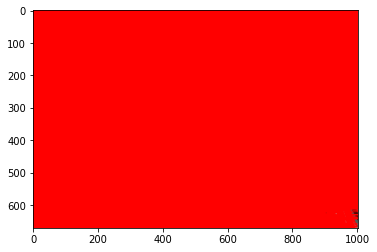

In [34]:
lines = np.squeeze(cv2.HoughLines(telefonica_edges, 1, np.pi / 180, 200))
print(lines.shape)
# Convert the lines to homogeneous coordinates
lines = np.array([np.cos(lines[:, 1]), np.sin(lines[:, 1]), -lines[:, 0]]).T
print(lines.shape)
# Draw andshow the lines
draw_lines(telefonica, lines)
plt.imshow(cv2.cvtColor(telefonica, cv2.COLOR_BGR2RGB))

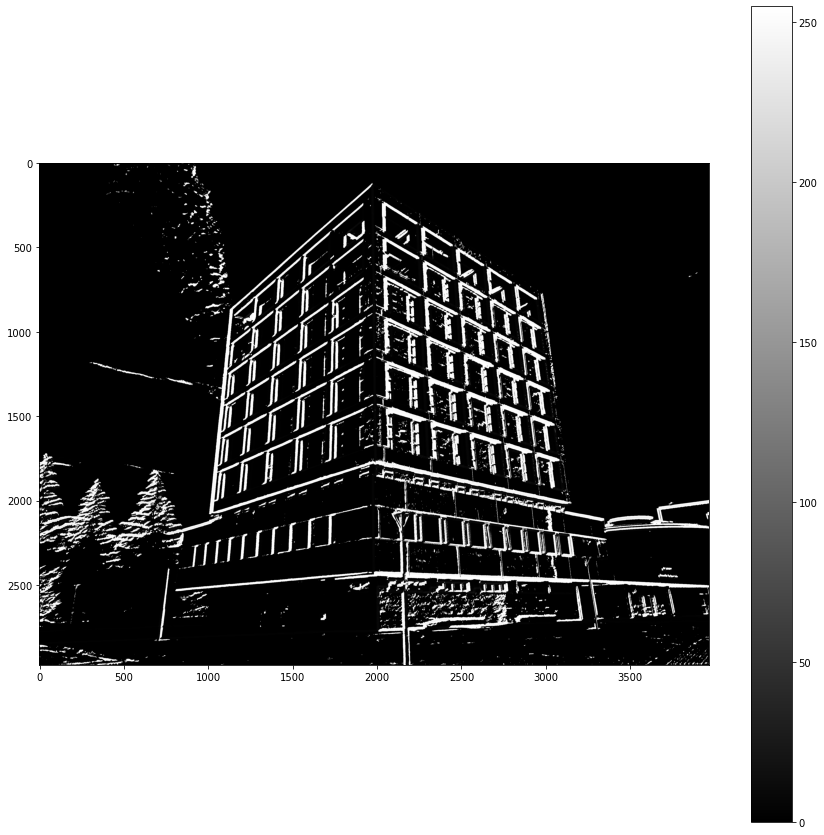

In [13]:
URJC_FILE = "imagenes/urjc.jpg"
urjc = imageio.imread(URJC_FILE)
urjc_gray = cv2.cvtColor(urjc, cv2.COLOR_RGB2GRAY)

sigma_x = 4
sigma_y = 6
n_x = 30
n_y = 30

hx = masc_gaus(sigma_x,n_x)
hdx = masc_deriv_gaus(sigma_x,n_x)

hy = masc_gaus(sigma_y,n_y)
hdy = masc_deriv_gaus(sigma_y,n_y)

Ix = snd.convolve1d(urjc_gray, weights=hdx, axis=0)
Iy = snd.convolve1d(urjc_gray, weights=hdy, axis=1)

edges2 = np.absolute(Ix) + np.absolute(Iy)

plt.figure(figsize=(15,15))
plt.imshow(edges2, cmap='gray')
plt.colorbar()

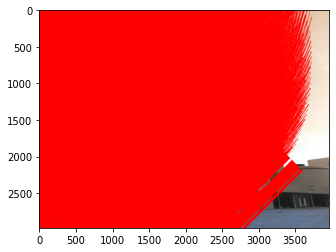

In [14]:
lines2 = np.squeeze(cv2.HoughLines(edges2, 1, np.pi/180, 350))
# Convert the lines to homogeneous coordinates
lines2 = np.array([np.cos(lines2[:, 1]), np.sin(lines2[:, 1]), -lines2[:, 0]]).T

# Draw andshow the lines
draw_lines(urjc, lines2)
plt.imshow(cv2.cvtColor(urjc, cv2.COLOR_BGR2RGB))

## Segmentación

**Ejercicio 6.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual inicial realizada por el usuario. 

Puedes utilizar, a modo de ejemplo, el código proporcionado en el archivo ``segm.py``. El archivo ``select_pixels.py`` contiene código para pintar sobre la imagen.

En esta primera versión 
1. toma como afinidad entre una pareja de píxeles la diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles marcados por el usuario.

Aplícalo al menos a la imagen ``horse.jpg`` aunque también debes intentar segmentar  ``flower.png``, ``persona.png``, ``car.jpg`` y ``mit2.png``, que son progresivamente más complejas. Muestra y discute los resultados. Justifica los errores. En el ejercicio siguiente tendrás la oportunidad de mejorar tu algoritmo para que pueda resolver casos más difíciles.

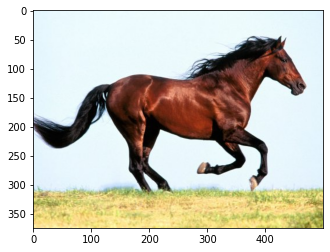

In [96]:
import sys
sys.path.insert(1, '/Users/emart/Visión por Computador/Practica1/code')

import numpy as np
import scipy
import scipy.misc as spm
import imageio
import maxflow
import matplotlib.pyplot as plt
import select_pixels as sel

img = imageio.imread('imagenes/horse.jpg')
plt.imshow(img)

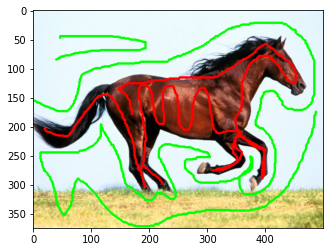

In [101]:
markImg = sel.select_fg_bg(img)
plt.imshow(markImg)

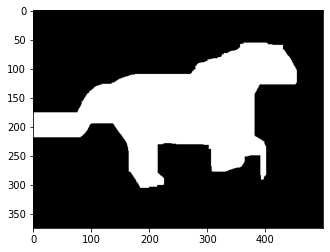

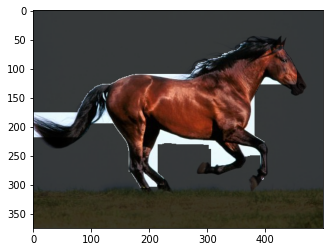

In [107]:
import math

# Create the graph.
g = maxflow.Graph[float]()

# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape[:2])

exp_aff_h = np.zeros((img.shape[0],img.shape[1]))
exp_aff_v = np.zeros((img.shape[0],img.shape[1]))

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
var = img_gray.var()

for row in range(img.shape[0]):
    for column in range(img.shape[1]):
        if(row < img.shape[0]-1):
            Idiff_v = int(img_gray[row][column]) - int(img_gray[row+1][column])
        else:
            Idiff_v = 0
        if(column < img.shape[1]-1):
            Idiff_h= int(img_gray[row][column]) - int(img_gray[row][column+1])
        else:
            Idiff_h = 0
            
        exp_aff_h[row][column]=math.exp((-1)*((Idiff_h)**2)/(2*(var**2)))
        exp_aff_v[row][column]=math.exp((-1)*((Idiff_v)**2)/(2*(var**2)))
  

# Construyo el grafo 
# Para construir el grafo relleno las estructuras
hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
# Construyo el grafo 
g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

# Leo los pixeles etiquetados
# Los marcados en rojo representan el objeto
pts_fg = np.transpose(np.where(np.all(np.equal(markImg,(255,0,0)),2)))
# Los marcados en verde representan el fondo
pts_bg = np.transpose(np.where(np.all(np.equal(markImg,(0,255,0)),2)))

# Incluyo las conexiones a los nodos terminales
# Pesos de los nodos terminales
g.add_grid_tedges(nodeids[pts_fg[:,0],pts_fg[:,1]], 1000000, 0)
g.add_grid_tedges(nodeids[pts_bg[:,0],pts_bg[:,1]], 0, 1000000)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# Muestro el resultado de la segmentacion
plt.figure()
plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
plt.show()

# Lo muestro junto con la imagen para ver el resultado
plt.figure()
wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

# Replico los pesos para cada canal y ordeno los indices
wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
plt.imshow(np.uint8(np.multiply(img,wgs)))
plt.show()

**Ejercicio 7.** Mejora el algoritmo anterior. Sugerencia:
* Refina la segmentación iterativamente,
* Mejora la función de afinidad entre píxeles,
* Mejora los términos unitarios, ...

Aplica el algoritmo a las imágenes utilizadas en el ejercicio anterior. Muestra y discute los resultados. Jusfifica en qué y por qué mejoran los resultados y plantea posibles soluciones para los fallos.

244


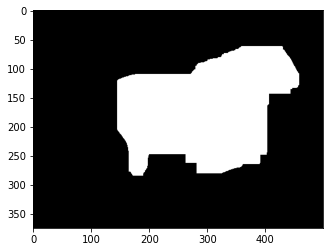

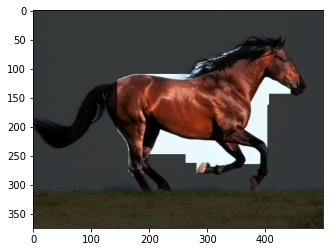

In [93]:
import math

# Create the graph.
g = maxflow.Graph[float]()

# Add the nodes. nodeids has the identifiers of the nodes in the grid.

nodeids = g.add_grid_nodes(img.shape[:2])
exp_aff_h = np.zeros((img.shape[0],img.shape[1]))
exp_aff_v = np.zeros((img.shape[0],img.shape[1]))

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
var = img_gray.var()

for row in range(img.shape[0]):
    for column in range(img.shape[1]):
        if(row < img.shape[0]-1):
            Idiff_v = int(img_gray[row][column]) - int(img_gray[row+1][column])
        else:
            Idiff_v = 0
        if(column < img.shape[1]-1):
            Idiff_h= int(img_gray[row][column]) - int(img_gray[row][column+1])
        else:
            Idiff_h = 0
            
        exp_aff_h[row][column]=math.exp((-1)*((Idiff_h)**2)/(2*(var**2)))
        exp_aff_v[row][column]=math.exp((-1)*((Idiff_v)**2)/(2*(var**2)))
            
# Construyo el grafo 
# Para construir el grafo relleno las estructuras
hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
# Construyo el grafo 
g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

# Leo los pixeles etiquetados
# Los marcados en rojo representan el objeto
pts_fg = np.transpose(np.where(np.all(np.equal(markImg,(255,0,0)),2)))
# Los marcados en verde representan el fondo
pts_bg = np.transpose(np.where(np.all(np.equal(markImg,(0,255,0)),2)))

# Incluyo las conexiones a los nodos terminales
# Pesos de los nodos terminales
g.add_grid_tedges(nodeids[pts_fg[:,0],pts_fg[:,1]], 1000000, 0)
g.add_grid_tedges(nodeids[pts_bg[:,0],pts_bg[:,1]], 0, 1000000)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# Muestro el resultado de la segmentacion
plt.figure()
plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
plt.show()

# Lo muestro junto con la imagen para ver el resultado
plt.figure()
wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

# Replico los pesos para cada canal y ordeno los indices
wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
plt.imshow(np.uint8(np.multiply(img,wgs)))
plt.show()